# Problema 4.9
###  Reactor semicontinuo isotérmico con reacción de segundo orden
"Elementos de Ingeniería de las reacciones químicas" ,Scott Fogler capitulo 4, página 220

![newnotebook](../imágenes/problema4.9.png)

Primero importaremos la librerías que nos ayudaran a resolver el problema (No olvides activar las librerías con **Shift+enter**):

In [3]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [4]:
def model(C, t, k=2.2, vo=0.05, Cbo=0.025, Vo=5, Cao=0.05):
    """
    :param C:
    :param t:
    :param k:
    :param vo:
    :param Cbo:
    :param Vo:
    :param Cao:
    :return:
    """
    Ca, Cb, Cc, Cd = C[0], C[1], C[2], C[3]
    rate = k * Ca * Cb
    V = Vo + vo * t
    X = (Cao*Vo-Ca*V)/(Cao*Vo)
    dCadt = -k*Ca*Cb-vo*Ca/V
    dCbdt = -k*Ca*Cb+vo*(Cbo-Cb)/V
    dCcdt = k*Ca*Cb-vo*Cc/V
    dCddt = k*Ca*Cb-vo*Cd/V
    return [dCadt, dCbdt, dCcdt, dCddt]

In [5]:
# Condiciones iniciales
C0 = [0.05, 0.025, 0, 0]

# Volúmen
t = np.linspace(0, 500, 500)

# Solución de ODES
C = odeint(model, C0, t)

Ca, Cb, Cc, Cd = C[:, 0], C[:, 1], C[:, 2], C[:, 3]
rate = 2.2 * Ca * Cb


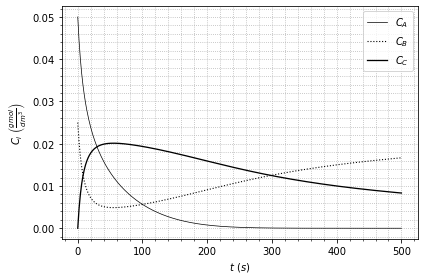

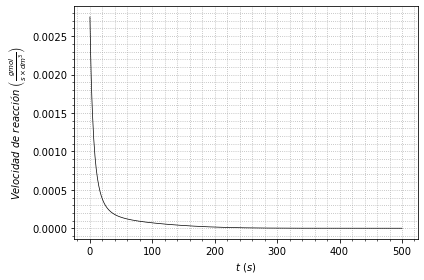

In [7]:
# Gráfica solución ODES
fig = plt.figure()
ax = fig.add_subplot(111)
ax.minorticks_on()
ax.plot(t, Ca, 'black', linewidth=0.7, label='$C_A$')
ax.plot(t, Cb, 'k:', linewidth=1.1, label='$C_B$')
ax.plot(t, Cc, 'k', linewidth=1.3, label='$C_C$')
# ax.plot(t, Cd, 'black', linewidth=0.7, label='$C_D$')
ax.set_xlabel('$t \\ (s)$')
ax.set_ylabel('$C_i \\ \\left( \\frac{gmol}{dm^3} \\right)$')
ax.grid(which='BOTH', ls=':')
ax.grid(True)
fig.tight_layout()
ax.legend()

fig2 = plt.figure()
ax1 = fig2.add_subplot(111)
ax1.minorticks_on()
ax1.plot(t, rate, 'black', linewidth=0.7)
ax1.set_xlabel('$t \\ (s)$')
ax1.set_ylabel('$Velocidad \\ de \\ reacción\\ \\left( ' +
               '\\frac{gmol}{s\\times dm^3} \\right)$')
ax1.grid(which='BOTH', ls=':')
ax1.grid(True)
fig2.tight_layout()

plt.show()